# Outliers - Anomalias

### Métodos univariados

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
from sklearn import datasets

%matplotlib inline
rcParams["figure.figsize"] = 7.5, 6

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

### Boxplot

<AxesSubplot:>

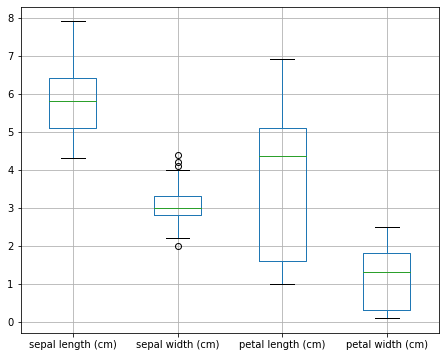

In [6]:
    df.boxplot()

Em sepal width tem outliers que saem do boxplot


In [7]:
larg_cepa = df["sepal width (cm)"]
iris_outliers = larg_cepa > 4
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2


In [10]:
iris_outliers = larg_cepa < 2.05
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0


### Método Tukey

In [12]:
pd.options.display.float_format = "{:.2f}".format
X_df = pd.DataFrame(df["sepal width (cm)"])
sumario = X_df.describe()
print(sumario)

       sepal width (cm)
count            150.00
mean               3.06
std                0.44
min                2.00
25%                2.80
50%                3.00
75%                3.30
max                4.40


#### Limite inferior e superior

In [13]:
iqr = sumario.loc['75%'] - sumario.loc["25%"]
iqr

sepal width (cm)   0.50
dtype: float64

In [15]:
limite_inf = sumario.loc["25%"] - iqr * 1.5
limite_inf

sepal width (cm)   2.05
dtype: float64

indica que tem pelo menos 1 outlier abaixo de 2.05

In [17]:
limite_sup = sumario.loc["75%"] + iqr * 1.5
limite_sup

sepal width (cm)   4.05
dtype: float64

Indica que tem pelo menos 1 outlier acima de 4.05

Os dados se confirmam no BOXPLOT

## Método multivariado

In [22]:
df = sns.load_dataset("iris")
df.columns=["comp da cepa", "larg da cepa", "comp da pétala", "larg da pétala", "espécie"]

<AxesSubplot:xlabel='espécie', ylabel='comp da cepa'>

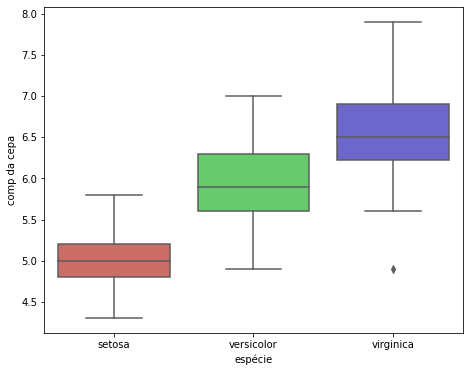

In [24]:
sns.boxplot(x="espécie", y="comp da cepa", data=df, palette="hls")

### Scatterplots

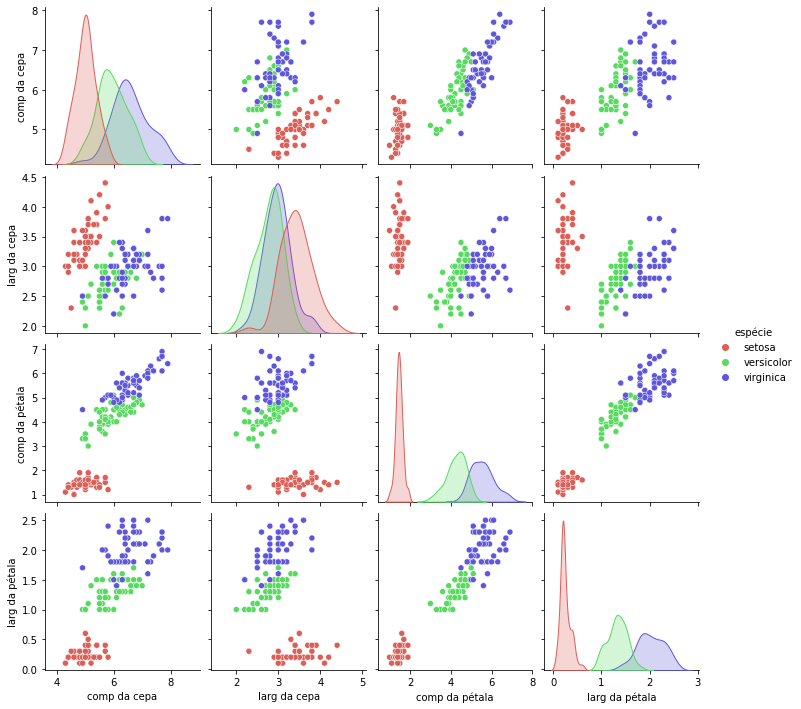

In [25]:
sns.pairplot(df, hue="espécie", palette="hls")

## Usando DBSCAN

In [28]:
from sklearn.cluster import DBSCAN
from collections import Counter

X = df[df.columns[:4]].values
y = df["espécie"].values

In [29]:
modelo = DBSCAN(eps=0.8, min_samples=19).fit(X)
print(modelo)

DBSCAN(eps=0.8, min_samples=19)


In [31]:
outliers_df = pd.DataFrame(X)

print(Counter(modelo.labels_))

Counter({1: 94, 0: 50, -1: 6})


In [33]:
filtro = modelo.labels_ == -1
print(outliers_df[filtro])

       0    1    2    3
98  5.10 2.50 3.00 1.10
105 7.60 3.00 6.60 2.10
117 7.70 3.80 6.70 2.20
118 7.70 2.60 6.90 2.30
122 7.70 2.80 6.70 2.00
131 7.90 3.80 6.40 2.00


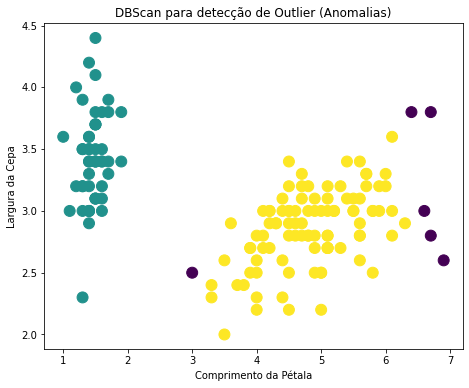

In [34]:
cores = modelo.labels_

plt.scatter(X[:, 2], X[:, 1], c=cores, s = 120)

plt.xlabel("Comprimento da Pétala")
plt.ylabel("Largura da Cepa")
plt.title("DBScan para detecção de Outlier (Anomalias)")
plt.show()